# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# leer conjuntos de datos en los DataFrames
#Se lee instacart_ordes, este archivo esta delimitado por;
instacart_orders=pd.read_csv('/datasets/instacart_orders.csv',sep=';')

#Leer archivo de products, el archivo esta separado por ;
products=pd.read_csv('/datasets/products.csv', sep =';')

# Leer archivo de aisles, el archivo esta separado por ;
aisles=pd.read_csv('/datasets/aisles.csv', sep=';')

#Leer el archivo de departments
departments=pd.read_csv('/datasets/departments.csv',sep=';')

#Leer el archivo de order_products
order_products=pd.read_csv('/datasets/order_products.csv',sep=';')

In [3]:
# Se muestra la información de instacart_orders
print('Información de instacart_orders')
instacart_orders.info()
print()

#Información de products
print('Información de products')
products.info()
print()

#Información de aisles
print('Información de Aisles')
aisles.info()
print()

#información de department
print('Información de Department')
departments.info()
print()

#Información de order_product
print('Información de order_product')
order_products.info(show_counts=True )

Información de instacart_orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB

Información de products
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 n

## Conclusiones sobre los DataFrames

### Instacart_orders DataFrame

Se ve que los datos de este archivo estan muy completos, en el único que faltan datos es en days_since_prior_order columna, order_dow que es el día de la semana en que se ha hecho un pedido es de tipo entero. El tipo de cada columna esta bien no hay que realizarle cambios.

### Products DataFrame
Solamente hay elementos faltantes en product_name. Los nombres faltantes se pueden obtener con el Id del producto, ya que eeste es único para cada producto. El tipo de cada columna esta correcto

### Aisles y department DataFrame
Estos archivos no tiene elementos faltantes y el tipo de cada columna esta correcto

### Order products DataFrame
Este contiene muchas filas, solo tiene datos faltantes en la columna de 'add_to_cart_order', si esta es una característica importante se puede llenar los datos que faltan, teniendo en cuenta el id de la orden se mira si las demás filas de esta orden tienen este dato y se puede deducir cual es valor que falta. Igualmente el 'add_to_cart_order' se puede converir a int ya que no hay valor con decimales. El resto de los datos están completos.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

Para cada archivo se va a buscar y eliminar las filas que estan totalmente duplicadas, luego se van a buscar los datos ausentes y se reescribiran depenediendo de lo que representen. También se vera si los tipos de datos son correctos o es necesario cambiarlos, por ejemplo anteriormente se observo datos que son floats que se pueder converir a int. 

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [4]:
# Revisa si hay pedidos duplicados
print ('Hay', instacart_orders.duplicated().sum(), 'datos duplicados')

Hay 15 datos duplicados


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [5]:
#imprimo cuales son las filas que están repetidas para ver que tinene en común
instacart_orders_duplicated=instacart_orders[instacart_orders.duplicated()]
print(instacart_orders_duplicated)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

In [6]:
# Se observa que todos los datos duplicados son de pedidos que se hicieron el miercoles a las 2:00 am
# Verifica todos estos pedidos 
pedidos_miercoles=instacart_orders.loc[(instacart_orders['order_dow']==3) & (instacart_orders['order_hour_of_day']==2)] 
print(pedidos_miercoles.duplicated().sum())

15


¿Qué sugiere este resultado?

Que el día miercoles a las 2am hubo una falla y se duplicaron 15 pedidos

In [7]:
#Se eliminan los datos duplicados
instacart_orders=instacart_orders.drop_duplicates()

#se verifica que los duplicados hayan quedado eliminados
instacart_orders.duplicated().sum()


0

In [8]:
# Vuelve a verificar si hay IDs duplicados de pedidos
instacart_orders['order_id'].duplicated().sum()

0


Habían 15 pedidos que estaban duplicados, estos eran pedidos que se habian realizado el día miercoles a las 2,, se eliminaron los duplicados de los pedidos. 

### `products` data frame

In [9]:
# Verifica si hay filas totalmente duplicadas
products.duplicated().sum()


0

In [10]:
# Verifica si hay IDs duplicadas de productos
products['product_id'].duplicated().sum()

0

In [11]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
#convertir los nombres a mayusculas para comparar mejor
products['product_name']=products['product_name'].str.upper()

#revisa si hay nombres de productos duplicados
products['product_name'].duplicated().sum()

1361

In [12]:
# Revisa si hay nombres duplicados de productos no faltantes
products['product_name'][products['product_name'].notna()].duplicated().sum()

104

No hay id del producto repetido, pero si hay nombres del producto repetido, esto significa que hay varios productos que tiene dos o mas ids. 


### `departments` data frame

In [13]:
# Revisar si hay filas totalmente duplicadas
departments.duplicated().sum()

0

In [14]:
# Revisa si hay IDs duplicadas 
departments['department_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hay ningun dato duplicado


### `aisles` data frame

In [15]:
# Revisar si hay filas totalmente duplicadas
aisles.duplicated().sum()

0

In [16]:
# Revisa si hay IDs 
aisles['aisle_id'].duplicated().sum()

0

Se observa que en el dataFrame de aisles no hay ningún dato duplicado

### `order_products` data frame

In [17]:
# Revisar si hay filas totalmente duplicadas
order_products.duplicated().sum()

0

In [18]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(order_products['order_id'].duplicated().sum())
print(order_products['order_id'].nunique())

4094961
450046


Se observo que hay 550.046 ordenes únicas, lo que quiere decir que en estos pedidos solamente compraron un producto y hay 4094961 ordenes duplicadas, las cuales hicieron un pedido de dos o más productos.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [19]:
# Encuentra los valores ausentes en la columna 'product_name'
#Hacemos un filtro poniendo solo las filas en las que no hay product_name
no_product_name=products[products['product_name'].isna()]

#Obtener cuales son los aisle_id y department_id en los que los productos no tienen nombre y la cantidad para cada uno
print(no_product_name['aisle_id'].value_counts())
print (no_product_name['department_id'].value_counts())

100    1258
Name: aisle_id, dtype: int64
21    1258
Name: department_id, dtype: int64



Todos los productos (1258) que no tienen product_name son del aisle 100 y departamento 21

In [20]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print ('aisle of missing products',aisles.query("aisle_id==100")['aisle'])

print('department of missing product',departments.query("department_id==21")['department'])

aisle of missing products 99    missing
Name: aisle, dtype: object
department of missing product 20    missing
Name: department, dtype: object



De lo anterior se puede ver que tanto el nombre del 'aisle' y del 'department' son 'missing' lo que significa que no hay información de estos productos.

In [21]:
# Completa los nombres de productos ausentes con 'Unknown'
    
products['product_name'].fillna('unknown', inplace=True)

In [22]:
#Verifico que no hayan valores ausentes
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Debido a que no hay información del departamento como del aisle de estos productos se remplaza los datos faltantes por 'unknown'. 

### `orders` data frame

In [23]:
# Encuentrar los valores ausentes days_since_prior_order
#creo un filtro de los valores ausentes que hay
nan_values=instacart_orders[instacart_orders['days_since_prior_order'].isna()]

print(nan_values)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478895   2589657   205028             1          0                 16   
478896   2222353   141211             1          2                 13   
478922   2272807   204154             1          1                 15   
478926   2499542    68810             1          4                 19   
478945   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

De lo anterior parece que todos los valores ausentes son del primer pedido del cliente
Para verificar esto obtenemos cual es el valor de 'order number' y cuantos son.

In [24]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(nan_values['order_number'].value_counts())

1    28817
Name: order_number, dtype: int64


In [25]:
#remplazar los valores ausente por 0
instacart_orders['days_since_prior_order'].fillna(0, inplace=True)

In [26]:
#verificamos que no hayan valores ausentes
instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  478952 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB



'days_since_prior_order' que esta ausente, es debido a que esta es la primera orden, por eso se reemplaza todos los valores ausentes por 0.

### `order_products` data frame

In [27]:
# Encuentra los valores ausentes    'add_to_cart_order' de la tabla order_productos.

#Hacemos un filtro poniendo solo las filas en las que no hay add_to_cart_order
nan_add_to_cart_order=order_products[order_products['add_to_cart_order'].isna()]
print(nan_add_to_cart_order)

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [28]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print('Número mínimo de la columna add_to_cart_order es:', order_products['add_to_cart_order'].min())
print('Número máximo de la columna add_to_cart_order es:',order_products['add_to_cart_order'].max())


Número mínimo de la columna add_to_cart_order es: 1.0
Número máximo de la columna add_to_cart_order es: 64.0


In [29]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
id_order=nan_add_to_cart_order['order_id']
id_order=id_order.drop_duplicates()
print(id_order)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
2437093       9310
2438301    2170451
3275635    2979697
3282194    1625713
3357079    1529171
Name: order_id, Length: 70, dtype: int64


In [30]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido y se cuenta cuantos productos tiene cada uno
df1 = order_products.query('order_id in @id_order').groupby(['order_id']).size().reset_index(name='count')
print(df1)

# revisar cual es el valor mínimo de productos por orden que tienen add_to_cart ausente

print('el valor minimo de id_product es:',df1['count'].min())

    order_id  count
0       9310     65
1      61355    127
2     102236     95
3     129627     69
4     165801     70
..       ...    ...
65   2999801     70
66   3125735     86
67   3308010    115
68   3347453     71
69   3383594     69

[70 rows x 2 columns]
el valor minimo de id_product es: 65




Todos los valores de add_to_cart que están ausentes forman parte de un pedido que tiene más de 64 productos.

In [31]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999
order_products['add_to_cart_order'].fillna(999, inplace=True)

# convierte la columna al tipo entero.
order_products['add_to_cart_order']=order_products['add_to_cart_order'].astype('int')

In [32]:
order_products.info(show_counts=True )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB



Los valores ausentes de 'add_to_cart_order' formaban parte de pedidos que tenían más de 64 productos por lo que se cambio los valores ausentes a 999.
El 'add_to_cart_order' era de tipo float, pero no contiene ningún decimal por lo tanto se convirtio a int


Una opción de porque el máximo de add_to_cart_order es 64 puede ser porque los clientes solo pueden adicionar al carro un máximo de 64 productos. También puede ser que el sistema que registra el orden en que se adicionaron los productos al carro tenga un error y no registre el add_to_cart_order después de esta cantidad.    
    


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Para cada DataFrame primero se miro si habían filas que estaban totalmente duplicadas, en los casos en que etso sucedio se eliminaron estas duplicadas. Para el caso del archivo de product habían casos donde el un producto tenía dos id_products diferentes. Luego se buscaron los datos ausentes y se análizo para poder remplazarlos.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [33]:
#obtener el valor mínimo y máximo para saber cual es el rango 
print('valor mínimo de order_hour_of_day',instacart_orders['order_hour_of_day'].min())
print('valor máximo de order_hour_of_day',instacart_orders['order_hour_of_day'].max())

valor mínimo de order_hour_of_day 0
valor máximo de order_hour_of_day 23


In [34]:
#obtener el valor mínimo y máximo para saber cual es el rango 
print('valor mínimo de order_dow',instacart_orders['order_dow'].min())
print('valor máximo de order_dow',instacart_orders['order_dow'].max())

valor mínimo de order_dow 0
valor máximo de order_dow 6


In [35]:
#mirar los valores únicos de 'order_hour_of_day' para ver si los valores son correctos
print (instacart_orders['order_hour_of_day'].unique())


[13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]


In [36]:
#se miran los valores únicos de order_dow
print (instacart_orders['order_dow'].unique())

[6 5 0 4 3 1 2]


Escribe aquí tus conclusiones

Con los valores mínimos y máximos de las dos columnas se pudo comprobar que 'order_hour_of_day' oscila entre 0 y 23 y 'order_dow' oscila entre 0 y 6).


### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

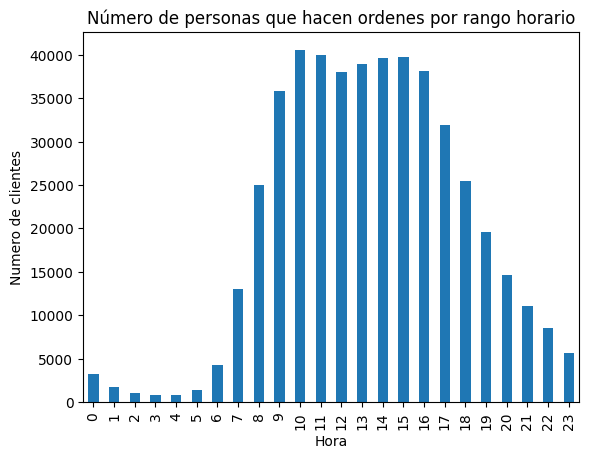

In [37]:
#Se crea un grafico de barras para poder ver la cantidad de personas que compran en los rango de horas.
y = instacart_orders['order_hour_of_day']
y.value_counts().sort_index().plot.bar(title='Número de personas que hacen ordenes por rango horario',xlabel='Hora', ylabel='Numero de clientes')
plt.show()

Para este caso se hizo un gráfico de barras. En el gráfico se puede ver que las horas en que menos hacen compras es en la madrugada, entre 0 horas y 8 de la mañana aproximadamente. En las horas en que más se realizan compras es entre las 10 de la mañana y las 18, luego después de las 20 horas se baja la cantidad de personas que compran.

### [A3] ¿Qué día de la semana compran víveres las personas?

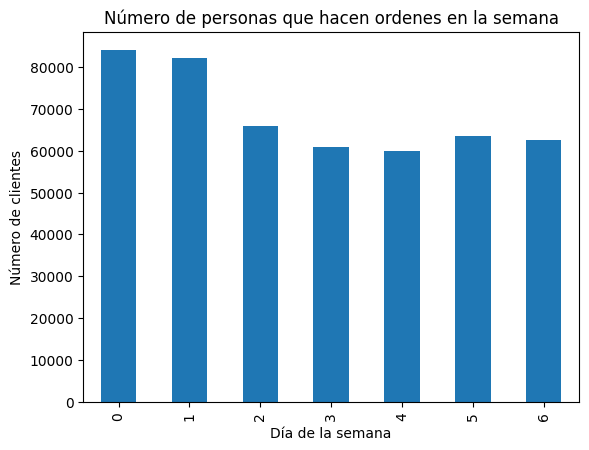

In [38]:
y = instacart_orders['order_dow']
y.value_counts().sort_index().plot.bar(title='Número de personas que hacen ordenes en la semana',xlabel='Día de la semana', ylabel='Número de clientes')
plt.show()


Del gráfico se puede ver que los días en que más compran son domingo y lunes, iercoles y jueves son los días en que menos compras se hacen. Por lo que se puede decir que los clientes prefieren hacer sus compras a principio de la semana. Entre los martes y sábados la gente compra menos, y no es casi la misma cantidad de personas que compran en estos días.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

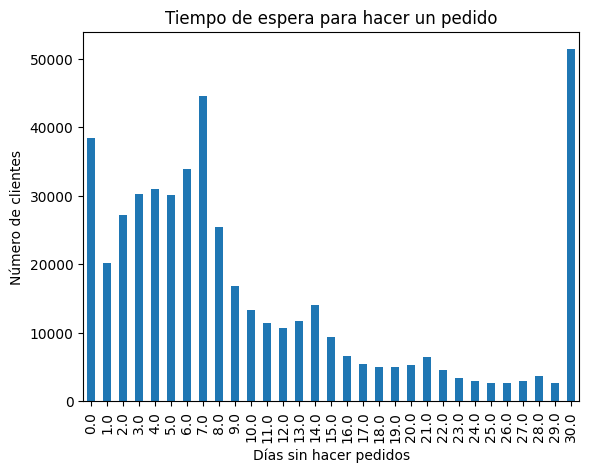

In [39]:
#Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido

y = instacart_orders['days_since_prior_order']
y.value_counts().sort_index().plot.bar(title='Tiempo de espera para hacer un pedido',xlabel='Días sin hacer pedidos', ylabel='Número de clientes')
plt.show()

Escribe aquí tus conclusiones

El tiempo que más espera la gente para hacer otro pedido es de 30 días. También hay una gran cantidad de personas que hacen el siguiente pedido entre 0 y 8 días. Hay muy pocas personas que hacer otro pedido 10 o 29 días después de hacer su último pedido. 

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [40]:
#obtener solo los datos de Wednesday
wednesday_orders = instacart_orders[['order_hour_of_day', 'order_dow']][(instacart_orders['order_dow'] == 3)]

#Obtengo solo los datos de Saturday
saturday_orders= instacart_orders[['order_hour_of_day', 'order_dow']][(instacart_orders['order_dow'] == 6)]

In [41]:
# obtengo la lista con los valores de las horas 
hours=instacart_orders['order_hour_of_day'].drop_duplicates().sort_values().reset_index()
hours=hours.drop('index',axis=1)

#se calcula la frecuencia de compras por hora para los días miércoles y sábado
freq1 = wednesday_orders["order_hour_of_day"].value_counts().sort_index()
freq2= saturday_orders["order_hour_of_day"].value_counts().sort_index()

In [42]:
#Hago un nuevo dataframe con los datos de las horas, la frecuencia para cada hora para el miércoles y sábado
fre_wed_sat=pd.concat([hours,freq1,freq2], axis='columns')
fre_wed_sat.columns=['hours','wednesday_fre','saturday_freq']
fre_wed_sat.head()

,hours,wednesday_fre,saturday_freq
0,0,373,464
1,1,215,254
2,2,106,177
3,3,101,125
4,4,108,118


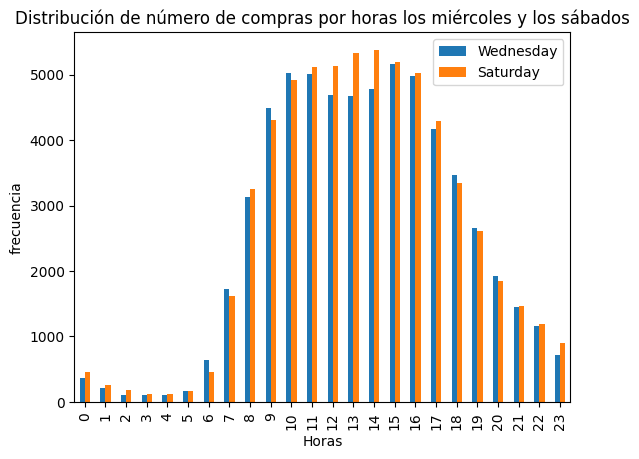

In [43]:
#Se hace el grafico de barras para los dos días
fre_wed_sat.plot(x='hours',kind='bar',title='Distribución de número de compras por horas los miércoles y los sábados', xlabel='Horas', ylabel='frecuencia')
plt.legend(['Wednesday','Saturday'])
plt.show()

Comparando la cantidad de compras los día miércoles y sábados, se observa que en ambos días en las horas que hay menos compras son en la madrugada, entre las 0 y las 7 y en la noche entre las 19 y las 23, entre las 8 y las 17 hay un aumento grande comparado con las horas mencionadas anteriormente. También se ve que los sábados en general hay mayor cantidad de compras. Los sábados las horas en que más compran entre 13 y 14 horas, mientras que los miercoles compran más entre a las 15 horas.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [44]:
#Se hace una tabla dinámica para obtener el número de ordenes que ha hecho cada usuario
#Para obtener el número de ordenes de cada usuario se busca el máximo de 'order_number'
pivot_data = instacart_orders.pivot_table(index='user_id',
                           
                            values='order_number',
                            aggfunc='max'
                           )
print(pivot_data)

         order_number
user_id              
2                   4
4                   6
5                   4
6                   4
7                  19
...               ...
206203              2
206206             66
206207             14
206208             34
206209             13

[157437 rows x 1 columns]


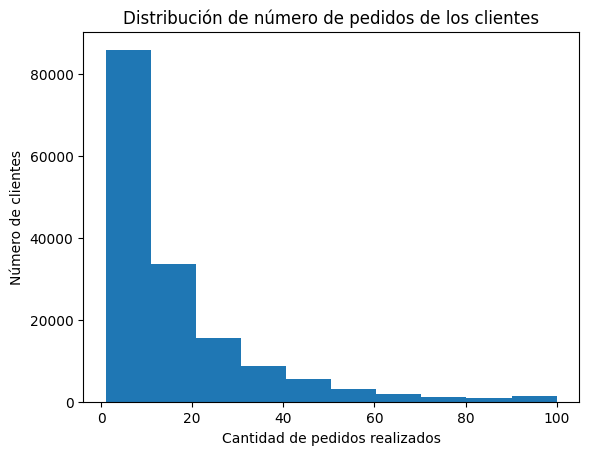

In [45]:
#Se realiza un histograma para ver la distribución de número de pedidos de los clientes
pivot_data.plot(kind='hist',title='Distribución de número de pedidos de los clientes',legend=False)
plt.xlabel("Cantidad de pedidos realizados") 
plt.ylabel("Número de clientes") 
plt.show()

Escribe aquí tus conclusiones

La mayoria de clientes hacen entre 1 y 10 pedidos, tambien hay una cantidad representativa de clientes que hacen entre 10 y 20 pedidos. Un porcentaje muy bajo de clientes han hecho más de 30 pedidos.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [46]:
#Se obtiene la cantidad de veces que compraron cada producto
freq_product=order_products['product_id'].value_counts()


#se ponen los primero 20
popular_product=freq_product.head(20).to_frame().reset_index()
#Se cambian los nombres de las columnas
popular_product.columns=['product_id','sale_quantity']

#del archivo products se obtiene el nombre del producto, para esto se combinan los dataframes (unión interna)
popular_products=popular_product.merge(products,on='product_id')

print(popular_products)

    product_id  sale_quantity              product_name  aisle_id  \
0        24852          66050                    BANANA        24   
1        13176          53297    BAG OF ORGANIC BANANAS        24   
2        21137          37039      ORGANIC STRAWBERRIES        24   
3        21903          33971      ORGANIC BABY SPINACH       123   
4        47209          29773      ORGANIC HASS AVOCADO        24   
5        47766          24689           ORGANIC AVOCADO        24   
6        47626          21495               LARGE LEMON        24   
7        16797          20018              STRAWBERRIES        24   
8        26209          19690                     LIMES        24   
9        27845          19600        ORGANIC WHOLE MILK        84   
10       27966          19197       ORGANIC RASPBERRIES       123   
11       22935          15898      ORGANIC YELLOW ONION        83   
12       24964          15292            ORGANIC GARLIC        83   
13       45007          14584     

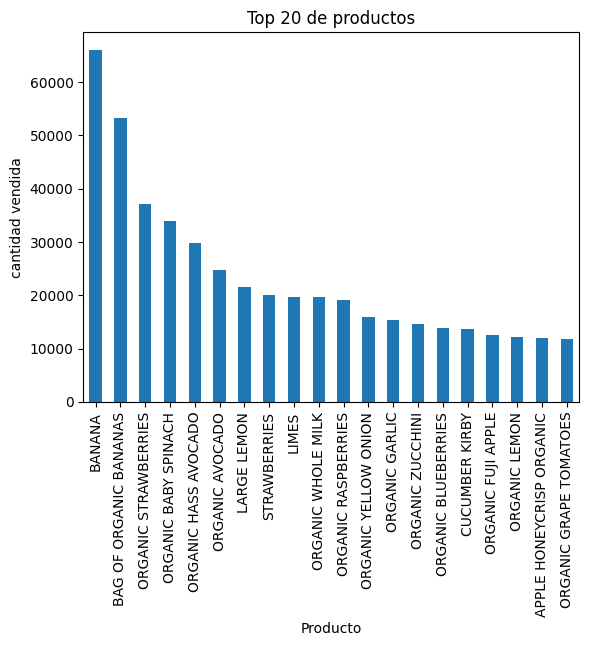

In [47]:
#Se realiza un diagrama de barras para visualizar la información obtenida
popular_products.plot(title='Top 20 de productos',x='product_name', y='sale_quantity', kind='bar',xlabel='Producto', ylabel='cantidad vendida',legend=False)
plt.show()

Todos los 20 productos más populares son frutas o verduras, excepto uno que es la leche. Muchos de estos productos son orgánicos. El producto más popular son las bananas. 


# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [48]:
#Se hace una tabla dinámica para obtener cuantos artículos ha pedido una persona en una orden, se usa el archivo order_product
#Para obtener el número de artículos en cada orden se busca el máximo de 'add_to_cart'
pivot_add_to_cart = order_products.pivot_table(index='order_id',                           
                            values='add_to_cart_order',
                            aggfunc='max'
                           )
print(pivot_add_to_cart)



          add_to_cart_order
order_id                   
4                        13
9                        15
11                        5
19                        3
20                        8
...                     ...
3421034                  17
3421053                   9
3421071                   5
3421077                   4
3421079                   1

[450046 rows x 1 columns]


In [49]:
#Se obtiene la cantidad de veces que compraron cada producto
wsa1=pivot_add_to_cart.value_counts()
wsa1

add_to_cart_order
5                    31923
6                    31698
4                    31054
7                    30822
3                    29046
                     ...  
58                      14
60                      13
63                      12
62                      11
64                       5
Length: 65, dtype: int64

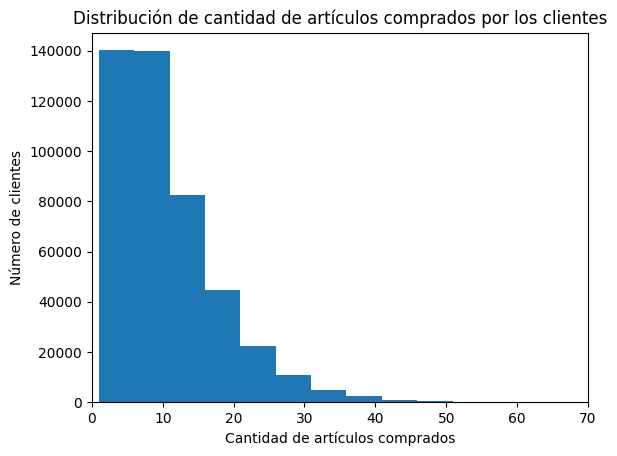

In [50]:
#Se realiza un histograma para ver la distribución

pivot_add_to_cart.plot(kind='hist',title='Distribución de cantidad de artículos comprados por los clientes', bins=200, legend=False)
plt.xlabel("Cantidad de artículos comprados") 
plt.ylabel("Número de clientes") 
plt.xlim(xmin=0, xmax = 70)
plt.show()



  Conclusiones
    
  La mayoria de los clientes realizan pedidos donde compran 15 o menos productos, son poco los clientes que hacen compras de 20 o más productos.  
 

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [51]:
#filtrar el dataframe order_product por los productos que se han reordenado
filter_reorder=order_products[order_products['reordered']==1]
filter_reorder

,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
5,2456893,21616,4,1
...,...,...,...,...
4544999,1622300,24852,1,1
4545000,1125324,40600,6,1
4545002,577211,15290,12,1
4545004,692640,47766,4,1


In [52]:
#se cuenta cuantas veces se ha reordenado cada producto
freq_reorder=filter_reorder['product_id'].value_counts()
print(freq_reorder)

24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
         ...  
2591         1
29201        1
27154        1
10789        1
2049         1
Name: product_id, Length: 36228, dtype: int64


In [53]:
#se ponen los primero 20
most_reorder=freq_reorder.head(20).to_frame().reset_index()
#Se cambian los nombres a laas columnas
most_reorder.columns=['product_id','reorder_time']

#del archivo products se obtiene el nombre del producto, para esto se combinan los dataframes (unión interna)
final_list_reorder=most_reorder.merge(products,on='product_id').drop(['aisle_id','department_id'], axis=1)
print (final_list_reorder)

    product_id  reorder_time              product_name
0        24852         55763                    BANANA
1        13176         44450    BAG OF ORGANIC BANANAS
2        21137         28639      ORGANIC STRAWBERRIES
3        21903         26233      ORGANIC BABY SPINACH
4        47209         23629      ORGANIC HASS AVOCADO
5        47766         18743           ORGANIC AVOCADO
6        27845         16251        ORGANIC WHOLE MILK
7        47626         15044               LARGE LEMON
8        27966         14748       ORGANIC RASPBERRIES
9        16797         13945              STRAWBERRIES
10       26209         13327                     LIMES
11       22935         11145      ORGANIC YELLOW ONION
12       24964         10411            ORGANIC GARLIC
13       45007         10076          ORGANIC ZUCCHINI
14       49683          9538            CUCUMBER KIRBY
15       28204          8989        ORGANIC FUJI APPLE
16        8277          8836  APPLE HONEYCRISP ORGANIC
17       3

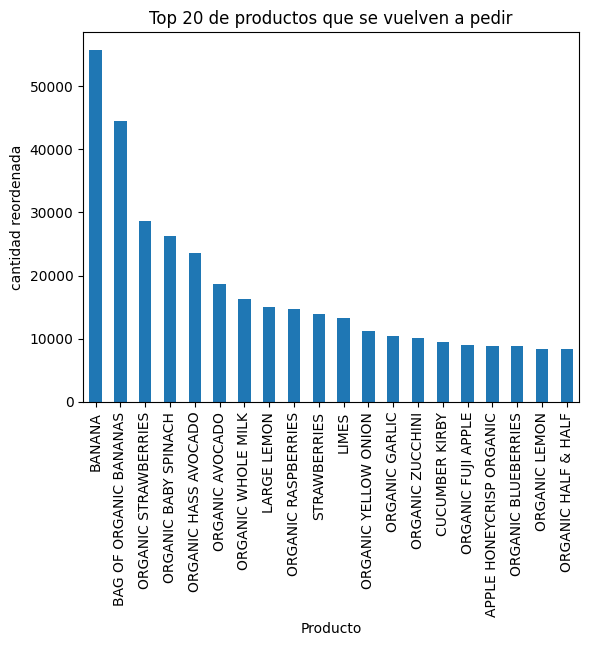

In [54]:
#Se realiza un diagrama de barras para visualizar la información obtenida
final_list_reorder.plot(title='Top 20 de productos que se vuelven a pedir',x='product_name', y='reorder_time', kind='bar',xlabel='Producto', ylabel='cantidad reordenada',legend=False)
plt.show()

La mayoria de los productos que se vuelven a pedir esta en la lista de los productos que mas compran las personas. Y también los productos que se encuentran en esta lista son frutas, verduras y leche. Lo que tienen en común estos productos es que las personas los consumen diariamente y son peresederos por lo que las personas los deben estar comprando más habitualmente.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [55]:
#Creo un nuevo data frame usando order_product y adicionandole la columna de user_id
order_product_name=order_products.merge(products,on='product_id')[['order_id','product_id','reordered','product_name']]
#order_product_name
#Agrupamos el dataframe por product_id y product_name
grouped_product=order_product_name.groupby(['product_id','product_name'])

#Para obtener la proporción calcula la media del campo reorder
product_proportion=grouped_product['reordered'].mean()

product_proportion.sort_values(ascending=False)

product_id  product_name                                                                 
14721       BONE STRENGTH TAKE CARE                                                          1.0
20949       VANILLA SANDWICH COOKIES                                                         1.0
6723        PALMIERS- PETITE                                                                 1.0
6732        NATURALLY SPARKLING MINERAL WATER                                                1.0
45088       CALIFORNIA DILL POLLEN & GARLIC GOAT CHEESE & OLIVE OIL INFUSION                 1.0
                                                                                            ... 
10485       CARAMEL APPLE POP                                                                0.0
37690       CALYPSO FRESH 2X CONCENTRATED SCENTSATIONS 166 LOADS LIQUID LAUNDRY DETERGENT    0.0
10484       AVOCADO AND GREENS                                                               0.0
10474       NUSTEVIA WHITE STEVIA POW

Para este se combinaron los archivos order_products y products para tener un nuevo dataframe con la información de las ordenes y los nombre de los productos. Luego se agrupan por productos y se saca la medio de reorder.
Los productos que más se vuelven a pedir son bone strength take care,  vanilla sandwich cookies,sparkling water y las que la proporción de volverlas a pedir es 0 son avocado and greens, nustevia and salsa for all season.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [56]:
#Creo un nuevo data frame usando order_product y adicionandole la columna de user_id
new_df=order_products.merge(instacart_orders,on='order_id')[['order_id','product_id','reordered','user_id']]
new_df.head(10)

,order_id,product_id,reordered,user_id
0,2141543,11440,0,58454
1,2141543,31869,1,58454
2,2141543,30233,1,58454
3,2141543,27966,1,58454
4,2141543,13176,1,58454
5,2141543,31263,0,58454
6,2141543,31471,0,58454
7,2141543,9825,1,58454
8,2141543,6187,1,58454
9,2141543,16759,1,58454


In [57]:
#Agrupar el dataframe por user_id
grouped_user=new_df.groupby('user_id')

#Para obtener la proporción de cada usuario, se suma la fila de reordered y se divide por la cantidad que hay en cada grupo
user_proportion=grouped_user['reordered'].sum()/grouped_user['reordered'].count()

In [58]:
user_proportion

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64

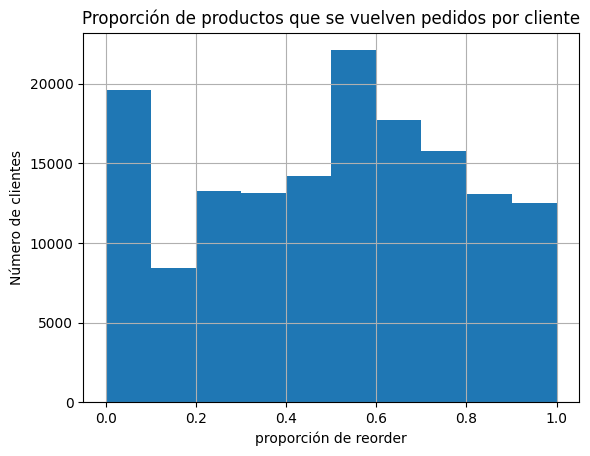

In [59]:
#Grafico los resultados de las proporciones para mirar mejor los resultados 

user_proportion.hist()
plt.xlabel("proporción de reorder") 
plt.ylabel("Número de clientes") 
plt.title('Proporción de productos que se vuelven pedidos por cliente')
plt.show()



Conclusiones
    
 Para realizar este punto, se combino primero el data frame  order_product y con user_id para tomar el nombre del producto de este último dataframe. Luego se agrupa el nuevo dataframe por user_id y para obtener la proporción de cada usuario, se suma la fila de reordered y se divide por la cantidad que hay en cada grupo. 
 
  De lo obtenido se puede concluir que hay una gran parte de los clientes vuelvee a pedir entre un 50% y 60% de los productos.


### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [60]:
#filtrar el dataframe por add_to_cart_order es 1
filter_df1=order_products[order_products['add_to_cart_order']==1]
freq_product1=filter_df1['product_id'].value_counts()

#se ponen los primero 20
popular1_product=freq_product.head(20).to_frame().reset_index()
#Se cambian los nombres a laas columnas
popular1_product.columns=['product_id','sale_quantity']

#del archivo products se obtiene el nombre del producto, para esto se combinan los dataframes (unión interna)
popular1_product_final=popular1_product.merge(products,on='product_id').drop(['aisle_id','department_id'], axis=1)

popular1_product_final

,product_id,sale_quantity,product_name
0,24852,66050,BANANA
1,13176,53297,BAG OF ORGANIC BANANAS
2,21137,37039,ORGANIC STRAWBERRIES
3,21903,33971,ORGANIC BABY SPINACH
4,47209,29773,ORGANIC HASS AVOCADO
5,47766,24689,ORGANIC AVOCADO
6,47626,21495,LARGE LEMON
7,16797,20018,STRAWBERRIES
8,26209,19690,LIMES
9,27845,19600,ORGANIC WHOLE MILK


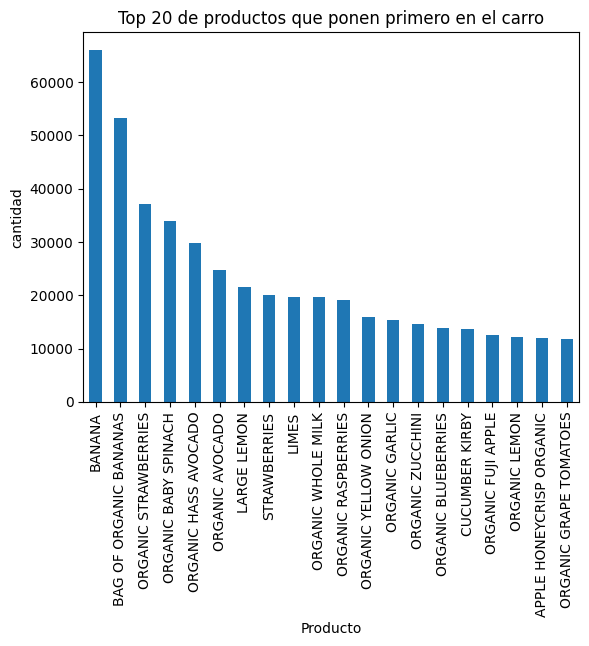

In [61]:
#Se realiza un diagrama de barras para visualizar la información obtenida
popular1_product_final.plot(title='Top 20 de productos que ponen primero en el carro',x='product_name', y='sale_quantity', kind='bar',xlabel='Producto', ylabel='cantidad',legend=False)
plt.show()

Los productos que la gente pone de primero en sus carros son los mismos a los productos que la gente más compra.

### Conclusion general del proyecto:

Para este proyecto primero se hizo el preprocesamiento de datos, donde se reviso en cada archivo si habían filas que estuvieran totalmente duplicadas, en caso de que hubieran estas se eliminaron, también se analizo si el tipo que tenía cada columna era correcto, por ejemplo que los ID fueran int. En caso de ser necesario se modifico el tipo de columna a la que fuera más correctas. Habían unas que eran de tipo float que se cambiaron a int. También se miro los valores auscente y se analizó por que se podían reemplazar dependiendo de lo que representara, revisando los datos que si tenía la columna. 

Del análisis se puede concluir que los horarios en los que los clientes hacen menos compras es en la madrugada, entre las 0 horas y las 8. Y donde más compras se realizan es a partir de las 10 de la mañana casi hasta las 18 horas, muchos clientes hacen pedido entre 1 y 8 días, también se observo que los productos que más vuelven a pedir son produtos más perecederos como lo son las frutas y verduras y la leche. Y que los clientes prefieren comprar productos orgánicos. La mayoria de los 20 productos más populares (que más se compran) son orgánicos e igualmente son los que más vuelven a comprar. Comparados con los usuarios que vuelven a realizar un pedido, son pocos los que se demoran 30 días para hacer un pedido nuevo. Hay una pequeña diferencia entre la cantidad de clientes que hacen sus compras los días miercóles y sábados, aunque en la mayoria de los horarios del día hay más clientes que hacen sus compras el día sábado. Y se observo que los días sábados las horas en que más compran son entre las 13 y las 14, mientras que los miercoles compran más a las 15 horas.